In [2]:
import matplotlib.pyplot as plt
from scipy import signal

## Example image 

(1200, 1200, 3)

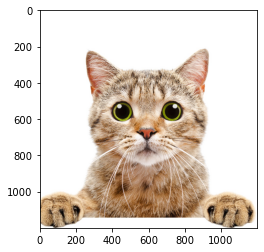

In [3]:
img = plt.imread(r"cat.jpg")
fig, ax = plt.subplots()
ax.imshow(img)
img.shape

# Steerable filters 

In [4]:
def apply_rgb(img, f):
    img_list = [signal.convolve(img[:,:,i], f, mode='same') for i in range(3)]
    img_n = np.stack(img_list, axis=2)
    img_n = np.array(img_n, dtype=int)
    return img_n

def circular_kernel(theta):
    e = np.exp(1)
    G0 = 2/e**2*np.array([[1,0, -1],
                         [e, 0 ,-e],
                         [1,0,-1]])
    G1 = 2/e**2*np.array([[-1,-e, -1],
                         [0, 0 ,0],
                         [1,e,1]])
    f = np.cos(theta)*G0 + np.sin(theta)*G1
    return f
def apply_filter(img, f):
    img = signal.convolve(img, f, mode='same')
    return img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


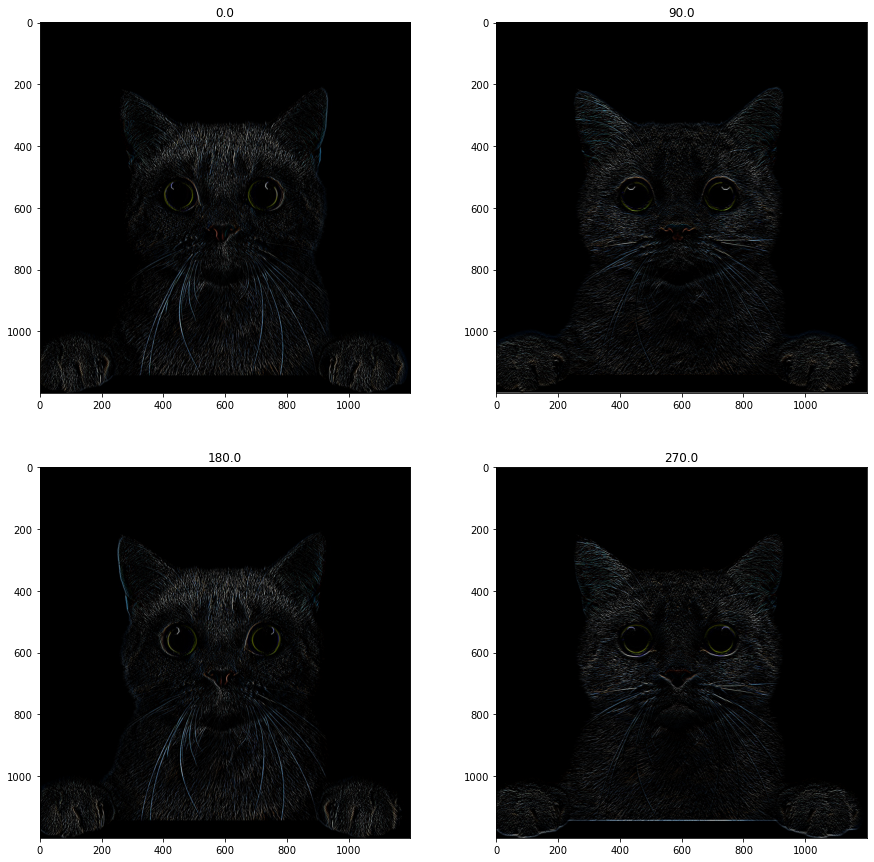

In [7]:
sobel = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
kernel = np.array([[-1,1,0],[-1,1,0],[-1,1,0]])
circ_f = circular_kernel(0)
avg_kernel = np.array([[0,.25,0],
                       [.25,0,.25],
                       [0,.25,0]])
img_n = apply_rgb(img, circ_f)
fig, ax = plt.subplots(2,2, figsize=(15,15))
ax = ax.flatten()
for i,a in enumerate(ax):
    theta = i*2*np.pi/4
    img_n = apply_rgb(img, circular_kernel(theta))
    a.set_title(f"{theta/(2*np.pi)*360}")
    a.imshow(img_n)

# Finite group transformations 

## Simple example 

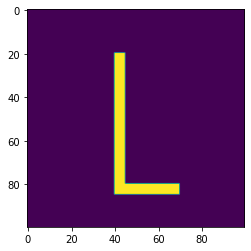

In [8]:
img_l = np.zeros((100,100))
img_l[20:80, 40:45] = 1
img_l[80:85,40:70] = 1
plt.imshow(img_l)

In [19]:
f0 = np.array([[1,0,-1],
            [1,0,-1],
             [1,0,-1]])
def rotate_90(f):
    return np.rot90(f, axes=(0,1))
def mirror(f, axis):
    return np.flip(f,axis)
f1 = rotate_90(f0)
f2 = rotate_90(f1)
f3 = rotate_90(f2)
filters = [f0, f1, f2, f3]

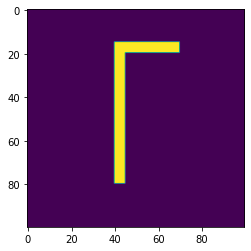

In [24]:
img_flipped = mirror(img_l, 0)
plt.imshow(img_flipped)

### rotate img 

In [21]:
img_l1 = rotate_90(img_l)
img_l2 = rotate_90(img_l1)
img_l3 = rotate_90(img_l2)
images = [img_l, img_l1, img_l2, img_l3]

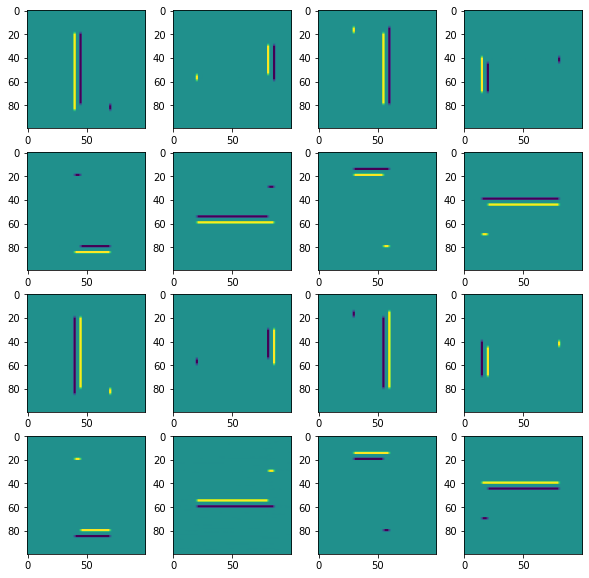

In [22]:
fig, ax = plt.subplots(4,4, figsize=(10,10))
for i,f in enumerate(filters):
    for j, img in enumerate(images):
        fm = apply_filter(img, f)
        ax[i,j].imshow(fm)